![picture](https://drive.google.com/uc?export=view&id=1K_GhwMAZaYPEqm-0ukMBxfmBew7N6GXA)<br>
<small>Rian Lopes</small><br>

Inscreva-se no canal <br>[Data Review](https://www.youtube.com/channel/UCYfY8KRS5nqoFBTuoLV0_jw) <br>
E siga nas redes sociais <br> [Instagram Data Review](https://www.instagram.com/data.review/)
<br>
<br>
<h1>Spark for Data Science and Machine Learning</h1>
<h2>MLLib for Classification and NLP</h2>


![picture](https://www.researchgate.net/profile/Safae-Sossi-Alaoui/publication/336205322/figure/fig2/AS:821889891041280@1572965228422/Spark-Ecosystem-C-Selected-algorithm-Spark-MLlib-MLlib-Main-Guide-Spark-220.ppm)

<h2>Yelp Dataset Reviews</h2>
é um conjunto de dados disponibilizado pela Yelp, contendo informações sobre avaliações de estabelecimentos como restaurantes, hotéis e lojas. Esse conjunto inclui dados como a avaliação, o texto da crítica, informações sobre o autor da avaliação, categoria do negócio, e muito mais. É amplamente utilizado para projetos de análise de sentimentos, classificação de texto e recomendação de negócios.

[Yelp Dataset Reviews](https://business.yelp.com/data/resources/open-dataset/)

![picture](https://www.solulab.com/wp-content/uploads/2024/01/Top-10-Applications-of-AI-in-NLP.png)

<h2> Classificação de Textos </h2>


![picture](https://cdn.prod.website-files.com/66966f43bae9fc1ac7cabd7d/678922d088eaa1a4446b04fd_66ab1539719e969b6a55efff_667416ac74eb64dc5cdf12ef_647882000ca01225cd800c11_iMITeHSnsnfPvxPg.png)

# Obtenção dos dados e análise exploratória

In [ ]:
# from google.colab import drive
# # Mount Google Drive
# drive.mount('/content/drive')

In [ ]:
### Origin folder ##

## IF retrieve from local Drive

tar_file_path = '/content/drive/MyDrive/spark/Yelp-JSON.zip'      ##'/content/drive/sua_pasta'

In [ ]:
# ## IF download straight to Colab Notebook
# !mkdir /content/yelp

# import requests
# import zipfile
# import io

# # URL for the Yelp dataset ZIP file
# url = 'https://business.yelp.com/external-assets/files/Yelp-JSON.zip'

# # Setting the headers to simulate a browser request
# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
# }

# # Download the ZIP file
# response = requests.get(url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
#     # Open the ZIP file in memory
#     zip_content = io.BytesIO(response.content)

#     # Extract the contents of the ZIP file
#     with zipfile.ZipFile(zip_content, 'r') as zip_ref:
#         zip_ref.extractall(destination_path)  # Extract to a folder in Colab
#     print("Download and extraction complete!")
# else:
#     print(f"Failed to download the file. HTTP Status code: {response.status_code}")

# # Define the path to the .tar file
# tar_file_path = '/content/yelp/yelp_dataset/Yelp JSON/yelp_dataset.tar'


In [ ]:
import tarfile
import zipfile
import os

# Path ZIP
zip_path = "/content/drive/MyDrive/spark/Yelp-JSON.zip"
zip_destination_path = "/content"

# Extraindo os arquivos
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(zip_destination_path)

#Path TAR
tar_file_path = '/content/Yelp JSON/yelp_dataset.tar'

# Define the extraction directory
extraction_path = '/content/datasets'     ##'/content/drive/sua_pasta_para_datasets'

# Create the directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the tar file
with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall(path=extraction_path)

print(f"Extraction complete. Files are extracted to: {extraction_path}")


Extraction complete. Files are extracted to: /content/datasets


In [ ]:
# List the files in the extracted directory
extracted_files = os.listdir(extraction_path)
print("Extracted files:", extracted_files)


Extracted files: ['yelp_academic_dataset_tip.json', 'yelp_academic_dataset_business.json', 'yelp_academic_dataset_user.json', 'yelp_academic_dataset_checkin.json', 'Dataset_User_Agreement.pdf', 'yelp_academic_dataset_review.json']


In [ ]:
from pyspark.sql import SparkSession

# Criando uma sessão Spark
spark = SparkSession.builder \
    .appName("Yelp Dataset") \
    .getOrCreate()

# Lendo o arquivo JSON para um DataFrame
df = spark.read.json('/content/datasets/yelp_academic_dataset_review.json')

## Exibindo dataset
df.show()


+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

In [ ]:
## Exibindo schema
df.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [ ]:
## Selecionando colunas de interesse

# df.select(['text', 'stars']).show(5, truncate=True)
df.select(['text', 'stars']).show(5, truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|text                                                                                                                                                         

In [ ]:
## Criando um dataframe com as colunas de interesse

df_reviews = df.select('text', 'stars')

In [ ]:
# Salvando o DataFrame em formato Parquet
df_reviews.write.mode('overwrite').parquet('reviews') ##'/content/drive/sua_pasta_para_reviews'
                                      ##.mode('overwrite').parquet('reviews') se o arquivo ja existe e vc quer sobreescrever

In [ ]:
## Número de reviews

df_reviews.count()

6990280

In [ ]:
# Análise exploratória breve: contagem de reviews por estrela

df_reviews.groupBy("stars").count() \
    .withColumnRenamed("count", "no of rows") \
    .orderBy("stars") \
    .show()

+-----+----------+
|stars|no of rows|
+-----+----------+
|  1.0|   1069561|
|  2.0|    544240|
|  3.0|    691934|
|  4.0|   1452918|
|  5.0|   3231627|
+-----+----------+



In [ ]:
from pyspark.sql.functions import length

# Calcular a média do número de caracteres
avg_length = df_reviews.withColumn("text_length", length(df_reviews["text"])).agg({"text_length": "avg"}).collect()[0][0]

print(f"A média de caracteres na coluna 'text' é: {avg_length}")


A média de caracteres na coluna 'text' é: 567.7644364746477


# Pré-Processamento

In [ ]:
# Verificando se há valores vazios ou NaN em 'df_reviews'
df_reviews.filter(df_reviews['text'].isNull() | (df_reviews['text'] == '') | df_reviews['stars'].isNull()).show()


+----+-----+
|text|stars|
+----+-----+
+----+-----+






![picture](https://www.researchgate.net/profile/Mohamed-Almadhoun/publication/375150807/figure/fig5/AS:11431281220734268@1706555413478/Performance-of-multi-class-classification-against-binary-classification-for-the-Arabic.ppm)<br>
[Performance of multi-class classification against binary classification](https://www.researchgate.net/figure/Performance-of-multi-class-classification-against-binary-classification-for-the-Arabic_fig5_375150807)

In [ ]:
# Substituindo os valores de 'stars' para 1 ou 0, diretamente na coluna

from pyspark.sql.functions import when

df_reviews = df_reviews.withColumn(
    "stars",
    when(df_reviews["stars"] == 5, 1).otherwise(0)
)

In [ ]:
df_reviews.groupBy("stars").count() \
    .withColumnRenamed("count", "no of rows") \
    .orderBy("stars") \
    .show()

+-----+----------+
|stars|no of rows|
+-----+----------+
|    0|   3758653|
|    1|   3231627|
+-----+----------+



# NLP

[MLLib Documentation](https://spark.apache.org/docs/3.5.4/ml-guide.html)

In [ ]:
# Seleção das colunas relevantes e tratamento de dados nulos

# Converter a coluna "stars" em uma coluna numérica "label" para a classificação
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="stars", outputCol="label")
df_reviews = indexer.fit(df_reviews).transform(df_reviews)


In [ ]:
df_reviews.take(1)

[Row(text="If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.", stars=0, label=0.0)]

In [ ]:
## Tokenização: dividir o texto em tokens (aqui tokens = palavras)
from pyspark.ml.feature import Tokenizer

tokenizer = Tokenizer(inputCol="text", outputCol="words")
df_reviews = tokenizer.transform(df_reviews)

In [ ]:
df_reviews.take(1)

[Row(text="If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.", stars=0, label=0.0, words=['if', 'you', 'decide', 'to', 'eat', 'here,', 'just', 'be', 'aware', 'it', 'is', 'going', 'to', 'take', 'about', '2', 'hours', 'from', 'beginning', 'to', 'end.', 'we', 'have', 'tried', 'it', 'multiple', 'times,', 'because', 'i', 'want', 'to', 'like', 'it!', 'i', 'have', 'been', 'to', "it's", 'other', 'locations', 'in', 'nj', 'and', 'never', 'had', 'a', 'bad', 'experience.', '', '', 'the', 'food', 'is', 'good,', 'but', 'it', 'takes', 'a', 've

In [ ]:
## Remoção de stopwords
from pyspark.ml.feature import StopWordsRemover

remover = StopWordsRemover(inputCol="words", outputCol="filtered")
df_reviews = remover.transform(df_reviews)

In [ ]:
df_reviews.take(1)

[Row(text="If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.", stars=0, label=0.0, words=['if', 'you', 'decide', 'to', 'eat', 'here,', 'just', 'be', 'aware', 'it', 'is', 'going', 'to', 'take', 'about', '2', 'hours', 'from', 'beginning', 'to', 'end.', 'we', 'have', 'tried', 'it', 'multiple', 'times,', 'because', 'i', 'want', 'to', 'like', 'it!', 'i', 'have', 'been', 'to', "it's", 'other', 'locations', 'in', 'nj', 'and', 'never', 'had', 'a', 'bad', 'experience.', '', '', 'the', 'food', 'is', 'good,', 'but', 'it', 'takes', 'a', 've

In [ ]:
df_reviews.take(1)[0]['words']


['if',
 'you',
 'decide',
 'to',
 'eat',
 'here,',
 'just',
 'be',
 'aware',
 'it',
 'is',
 'going',
 'to',
 'take',
 'about',
 '2',
 'hours',
 'from',
 'beginning',
 'to',
 'end.',
 'we',
 'have',
 'tried',
 'it',
 'multiple',
 'times,',
 'because',
 'i',
 'want',
 'to',
 'like',
 'it!',
 'i',
 'have',
 'been',
 'to',
 "it's",
 'other',
 'locations',
 'in',
 'nj',
 'and',
 'never',
 'had',
 'a',
 'bad',
 'experience.',
 '',
 '',
 'the',
 'food',
 'is',
 'good,',
 'but',
 'it',
 'takes',
 'a',
 'very',
 'long',
 'time',
 'to',
 'come',
 'out.',
 'the',
 'waitstaff',
 'is',
 'very',
 'young,',
 'but',
 'usually',
 'pleasant.',
 'we',
 'have',
 'just',
 'had',
 'too',
 'many',
 'experiences',
 'where',
 'we',
 'spent',
 'way',
 'too',
 'long',
 'waiting.',
 'we',
 'usually',
 'opt',
 'for',
 'another',
 'diner',
 'or',
 'restaurant',
 'on',
 'the',
 'weekends,',
 'in',
 'order',
 'to',
 'be',
 'done',
 'quicker.']

In [ ]:
df_reviews.take(1)[0]['filtered']

['decide',
 'eat',
 'here,',
 'aware',
 'going',
 'take',
 '2',
 'hours',
 'beginning',
 'end.',
 'tried',
 'multiple',
 'times,',
 'want',
 'like',
 'it!',
 'locations',
 'nj',
 'never',
 'bad',
 'experience.',
 '',
 '',
 'food',
 'good,',
 'takes',
 'long',
 'time',
 'come',
 'out.',
 'waitstaff',
 'young,',
 'usually',
 'pleasant.',
 'many',
 'experiences',
 'spent',
 'way',
 'long',
 'waiting.',
 'usually',
 'opt',
 'another',
 'diner',
 'restaurant',
 'weekends,',
 'order',
 'done',
 'quicker.']

<h2>BoW</h2>
O BoW (Bag of Words) é uma técnica de extração de características que cria uma representação vetorial de um documento com base nas palavras presentes nele, sem considerar a ordem das palavras. Isso é feito criando um vetor com a contagem de cada palavra no vocabulário.

In [ ]:
## Instanciando HashingTF para converter os tokens em vetores de contagem (Bag of Words)
from pyspark.ml.feature import HashingTF

hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=10)
df_reviews = hashingTF.transform(df_reviews)

In [ ]:
df_reviews.take(1)

[Row(text="If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.", stars=0, label=0.0, words=['if', 'you', 'decide', 'to', 'eat', 'here,', 'just', 'be', 'aware', 'it', 'is', 'going', 'to', 'take', 'about', '2', 'hours', 'from', 'beginning', 'to', 'end.', 'we', 'have', 'tried', 'it', 'multiple', 'times,', 'because', 'i', 'want', 'to', 'like', 'it!', 'i', 'have', 'been', 'to', "it's", 'other', 'locations', 'in', 'nj', 'and', 'never', 'had', 'a', 'bad', 'experience.', '', '', 'the', 'food', 'is', 'good,', 'but', 'it', 'takes', 'a', 've

In [ ]:
print("Texto original:")
print(" ".join(df_reviews.take(1)[0]['words']))
print("")
print("Texto sem stopwords:")
print(" ".join(df_reviews.take(1)[0]['filtered']))
print("")
print("Vetor de tokens: (no of features: [features])")
print(str(df_reviews.take(1)[0]['rawFeatures']))


Texto original:
if you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. we have tried it multiple times, because i want to like it! i have been to it's other locations in nj and never had a bad experience.   the food is good, but it takes a very long time to come out. the waitstaff is very young, but usually pleasant. we have just had too many experiences where we spent way too long waiting. we usually opt for another diner or restaurant on the weekends, in order to be done quicker.

Texto sem stopwords:
decide eat here, aware going take 2 hours beginning end. tried multiple times, want like it! locations nj never bad experience.   food good, takes long time come out. waitstaff young, usually pleasant. many experiences spent way long waiting. usually opt another diner restaurant weekends, order done quicker.

Vetor de tokens: (no of features: [features])
(10,[0,1,2,3,4,5,6,7,8,9],[5.0,5.0,8.0,2.0,8.0,3.0,7.0,4.0,3.0,4.0])


In [ ]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, StringIndexer, HashingTF

df_reviews = df.select('text', 'stars')
df_reviews = df_reviews.withColumn(
    "stars",
    when(df_reviews["stars"] == 5, 1).otherwise(0)
)

# Pegando uma amostra aleatória de n linhas para teste (substitua n pelo valor desejado)
df_reviews = df_reviews.sample(withReplacement=False, fraction=0.1)  # Exemplo: 10% dos dados
# Converter a coluna "stars" em uma coluna numérica "label" para a classificação


indexer = StringIndexer(inputCol="stars", outputCol="label")

df_reviews = indexer.fit(df_reviews).transform(df_reviews)

# Tokenização
tokenizer = Tokenizer(inputCol="text", outputCol="words")

# Remoção de Stopwords
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

# Vetorização Bag of Words
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=50)



In [ ]:
from pyspark.ml import Pipeline

# Definição do pipeline
pipeline = Pipeline(stages=[tokenizer, remover, hashingTF])

# Aplicação do pipeline
model = pipeline.fit(df_reviews)
featurizedData = model.transform(df_reviews)

# Exibir resultados
featurizedData.select("stars", "filtered", "rawFeatures").show(truncate=False)

+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Treinamento e teste

In [ ]:
from pyspark.ml.classification import LogisticRegression, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Dividindo os dados em treino e teste
train_data, test_data = featurizedData.randomSplit([0.8, 0.2], seed=1234)

In [ ]:
# ======= Logistic Regression =======
lr = LogisticRegression(featuresCol="rawFeatures", labelCol="stars")
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

In [ ]:
# Avaliação LR
evaluator = BinaryClassificationEvaluator(labelCol="stars")
lr_auc = evaluator.evaluate(lr_predictions)
print(f"Logistic Regression - Área sob a Curva ROC (AUC): {lr_auc}")

Logistic Regression - Área sob a Curva ROC (AUC): 0.6695963714166853


In [ ]:
# ======= Gradient-Boosted Tree Classifier =======
gbt = GBTClassifier(featuresCol="rawFeatures", labelCol="stars", maxIter=10)
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

In [ ]:
# Avaliação GBT
gbt_auc = evaluator.evaluate(gbt_predictions)
print(f"Gradient-Boosted Tree - Área sob a Curva ROC (AUC): {gbt_auc}")

Gradient-Boosted Tree - Área sob a Curva ROC (AUC): 0.6534247102606362


In [ ]:
# ======= Comparação =======
print("\nComparação dos Modelos:")
print(f"Logistic Regression AUC: {lr_auc:.4f}")
print(f"Gradient-Boosted Tree AUC: {gbt_auc:.4f}")

if lr_auc > gbt_auc:
    print("⚡ Logistic Regression teve melhor desempenho!")
else:
    print("🌳 Gradient-Boosted Tree teve melhor desempenho!")


Comparação dos Modelos:
Logistic Regression AUC: 0.6696
Gradient-Boosted Tree AUC: 0.6534
⚡ Logistic Regression teve melhor desempenho!


# Modelos pré-treinados

<h2>Repositório do NILC - Núcleo Interinstitucional de Linguística Computacional</h2>

[NILC - USP](http://nilc.icmc.usp.br/embeddings)


<h2>Word2Vec</h2>

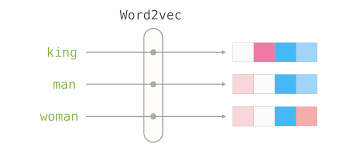

In [ ]:
!wget -O cbow_s50.zip "http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s50.zip"
!unzip cbow_s50.zip

--2025-06-20 22:55:49--  http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s50.zip
Connecting to 143.107.183.175:22980... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170360268 (162M) [application/octet-stream]
Saving to: ‘cbow_s50.zip’

cbow_s50.zip        100%[===================>] 162.47M  11.2MB/s    in 16s     

2025-06-20 22:56:06 (10.2 MB/s) - ‘cbow_s50.zip’ saved [170360268/170360268]

Archive:  cbow_s50.zip
  inflating: cbow_s50.txt            


In [ ]:

!pip uninstall numpy gensim -y
!pip install --no-cache-dir numpy gensim



Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 131.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 229.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 178.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 186.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.

In [ ]:
from pyspark.sql import SparkSession

# Criando uma sessão Spark
spark = SparkSession.builder \
    .appName("Yelp Dataset") \
    .getOrCreate()
df_reviews = spark.read.parquet('reviews')


In [ ]:
import gensim
import numpy as np
from pyspark.sql.functions import udf, when
from pyspark.sql.types import ArrayType, FloatType
from pyspark.ml import Pipeline
from pyspark.ml.feature import Tokenizer, StopWordsRemover

df_reviews = df_reviews.withColumn(
    "stars",
    when(df_reviews["stars"] == 5, 1).otherwise(0)
)

# Caminho atualizado para o modelo baixado e descompactado
model_path = "/content/cbow_s50.txt"  # Ajuste se necessário
word_vectors = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=False)

# Função para converter tokens em embeddings
def tokens_to_vec(tokens):
    vectors = [word_vectors[word] for word in tokens if word in word_vectors]
    if not vectors:
        return [float(0.0)] * 50  # O modelo cbow_s50 tem dimensão 50
    return [float(x) for x in np.mean(vectors, axis=0)]  # Conversão explícita para float

# Criar UDF para Spark
word2vec_udf = udf(tokens_to_vec, ArrayType(FloatType()))

# Amostragem dos dados
df_sampled = df_reviews.sample(fraction=0.1, seed=42)  # Seed para reprodutibilidade

# Tokenização
tokenizer = Tokenizer(inputCol="text", outputCol="words")

# Remoção de Stopwords
remover = StopWordsRemover(inputCol="words", outputCol="filtered")

# Define pipeline (sem word2vec_udf ainda)
pipeline = Pipeline(stages=[tokenizer, remover])

# Treina o pipeline
model = pipeline.fit(df_sampled)
featurizedData = model.transform(df_sampled)

# Aplica a UDF após o pipeline
featurizedData = featurizedData.withColumn("word2vec_features", word2vec_udf("filtered"))

# Exibe os resultados
featurizedData.select("stars", "filtered", "word2vec_features").show(truncate=False)


+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
featurizedData.count()

699649

In [ ]:
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import col, udf
from pyspark.sql.types import ArrayType, DoubleType

# Converter `word2vec_features` para array de double
featurizedData = featurizedData.withColumn(
    "word2vec_features", col("word2vec_features").cast(ArrayType(DoubleType()))
)

# Define uma UDF para converter array -> DenseVector
array_to_vector_udf = udf(lambda arr: Vectors.dense(arr), VectorUDT())


featurizedData = featurizedData.withColumn("word2vec_vector", array_to_vector_udf(col("word2vec_features")))



In [ ]:
from pyspark.ml.classification import LogisticRegression, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Dividindo os dados em treino e teste
train_data, test_data = featurizedData.randomSplit([0.8, 0.2], seed=1234)

In [ ]:
# ======= Logistic Regression =======
lr = LogisticRegression(featuresCol="word2vec_vector", labelCol="stars")
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

In [ ]:
# Avaliação LR
evaluator = BinaryClassificationEvaluator(labelCol="stars")
lr_auc = evaluator.evaluate(lr_predictions)
print(f"Logistic Regression - Área sob a Curva ROC (AUC): {lr_auc}")

Logistic Regression - Área sob a Curva ROC (AUC): 0.6791121419571501


In [ ]:
# ======= Gradient-Boosted Tree Classifier =======
gbt = GBTClassifier(featuresCol="word2vec_vector", labelCol="stars", maxIter=10)
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

In [ ]:
# Avaliação GBT
gbt_auc = evaluator.evaluate(gbt_predictions)
print(f"Gradient-Boosted Tree - Área sob a Curva ROC (AUC): {gbt_auc}")

Gradient-Boosted Tree - Área sob a Curva ROC (AUC): 0.6615566076734909


In [ ]:
# ======= Comparação =======
print("\nComparação dos Modelos:")
print(f"Logistic Regression AUC: {lr_auc:.4f}")
print(f"Gradient-Boosted Tree AUC: {gbt_auc:.4f}")

if lr_auc > gbt_auc:
    print("⚡ Logistic Regression teve melhor desempenho!")
else:
    print("🌳 Gradient-Boosted Tree teve melhor desempenho!")


Comparação dos Modelos:
Logistic Regression AUC: 0.6791
Gradient-Boosted Tree AUC: 0.6616
⚡ Logistic Regression teve melhor desempenho!
